First, import the usual libraries
- `math`: basic math operations
- `os`: enable file manipulation with the OS
- `sys`: enable interaction with commandline
- `glob`: more variable manipulation
- `matplotlib.pyplot`: default plotter (I personally like ggplot waaaaay better. E)
    - `inline`: so that plots are shown in the notebook
- `seaborn`: nicer plots
- `numpy`: all number cruching done here
- `pandas`: data wrangling

In [1]:
import math  
import os   
import glob 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats


In [2]:
# Path to the folder where all the raw data is located
src = '/home/ejam/documents/css893/raw_data/'

# Path where we will save outputs
dst = '/home/ejam/documents/css893/output/'

# Matrix with raw SNP data
#file_snp_raw = 'snp_imputed_chr10_sample.csv'

# Matrix with imputed SNP data
file_snp_imp = 'B73_plus_RTAs_snp_matrix_imputed/widiv_942g_979873SNPs_imputed_filteredGenos_withRTA_AGPv4.hmp.txt'

# Matrix with gene expression (FPKM)
file_gen_high_z = 'high_z.csv'

file_gen = '942_FPKM_B73_genes_w_feature.txt'

In [19]:
genes_w_features_raw = pd.read_table(src+file_gen)

/home/ejam/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
genes_w_features_raw

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,Zm00001d012719,8,gene,179164454,179168169,5.825000,4.845710,6.323400,6.999010,6.661100,...,15.154700,12.870700,8.81507,13.77870,8.31790,12.78320,4.94950,9.39900,10.41090,15.840500
1,Zm00001d024742,10,gene,85863323,85863746,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
2,Zm00001d007137,2,tRNA_gene,223153553,223153627,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
3,Zm00001d025653,10,gene,125107973,125113328,9.350780,9.954800,7.735490,10.360900,9.072890,...,4.685600,3.870230,5.27849,5.17829,3.80291,6.44675,5.61858,3.98055,4.17545,4.500850
4,Zm00001d036003,6,gene,65322472,65323171,8.955580,0.333921,5.445820,0.332438,1.232330,...,0.232934,0.721774,2.95424,8.44716,12.33680,1.19629,1.71452,7.01768,11.75760,0.793672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44254,Zm00001d028653,1,gene,41833737,41838204,368.777000,301.349000,412.319000,310.820000,278.737000,...,172.293000,186.552000,147.63300,165.60800,147.58300,244.82100,171.15400,219.07400,147.01700,165.612000
44255,Zm00001d009511,8,gene,68418436,68421217,6.003590,5.297160,10.421700,6.304130,4.856300,...,4.120700,4.670860,3.47752,4.92093,6.26904,4.95873,7.25625,5.66864,4.28185,5.765310
44256,Zm00001d032828,1,gene,239455289,239464371,151.479000,46.479600,65.075600,70.169900,59.555600,...,100.249000,102.226000,100.29500,64.90400,91.17440,101.80300,108.58200,63.72140,95.96760,56.404900
44257,Zm00001d002031,2,gene,4673452,4674247,0.237774,0.386886,0.179111,0.415566,0.192793,...,0.000000,0.000000,0.00000,0.00000,0.00000,1.51552,0.00000,0.00000,0.00000,2.555730


In [41]:
downIndex = np.array([])
for i in range(1,11):
    chromo = genes_w_features_raw[genes_w_features_raw['chromosome'] == '{}'.format(i)]
    downIndex = np.concatenate((downIndex, chromo.index.values))
    chromo = genes_w_features_raw[genes_w_features_raw['chromosome'] == i]
    downIndex = np.concatenate((downIndex, chromo.index.values))

downIndex.astype(int)
fpkm = genes_w_features_raw.iloc[downIndex].astype({'chromosome': int})

In [42]:
fpkm

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
7,Zm00001d033979,1,gene,279975978,279978430,76.133600,65.408400,38.507300,52.069200,75.549300,...,42.306200,41.30440,36.242400,33.992500,30.771400,23.95840,24.665400,20.311500,17.770000,38.619700
22,Zm00001d031073,1,gene,175980668,175983357,1.381800,0.621732,0.852335,1.681980,0.958799,...,1.341690,1.24107,0.877111,1.106620,1.758750,2.21258,1.086100,1.034650,2.463450,0.652187
23,Zm00001d034961,1,gene,306881093,306895296,0.026991,0.005325,0.016174,0.011593,0.018716,...,0.009031,0.00000,0.015687,0.030662,0.000000,0.00000,0.019362,0.018610,0.034208,0.026505
35,Zm00001d022701,1,lincRNA_gene,27303532,27304500,0.000000,0.040027,0.018941,0.088167,0.060270,...,0.000000,0.00000,0.000000,0.181800,0.110069,0.14295,0.111420,0.110546,0.000000,0.074827
42,Zm00001d022951,1,lincRNA_gene,247966116,247966918,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44227,Zm00001d026285,10,gene,142830920,142833263,35.460100,18.770000,34.348100,24.976100,17.365900,...,29.874600,28.64610,28.716100,22.295200,32.101300,26.38830,26.740900,28.773300,51.465900,19.649100
44240,Zm00001d024994,10,gene,98236754,98238985,0.000000,0.000000,0.011151,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
44241,Zm00001d025980,10,gene,135233564,135243356,0.005746,1.341360,1.990890,3.463810,0.019554,...,1.229720,1.08375,2.647820,0.351825,2.829940,2.23490,0.000000,1.444510,4.004050,0.143024
44243,Zm00001d025452,10,gene,119056860,119059431,22.072400,24.690400,26.629600,21.675000,18.564200,...,27.162500,27.82370,38.888400,27.588700,30.645000,30.71800,23.144400,22.163300,30.311500,18.722500


In [43]:
total_exp = fpkm.iloc[:, 5:].sum(axis='index')
tpm = fpkm.iloc[:, 5:]*1e6
tpm = tpm.div(other=total_exp, axis='columns')
tpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
7,98.533998,100.628646,52.277034,72.760824,107.983707,79.351230,62.900622,68.731793,117.732284,92.350364,...,50.732940,49.547404,42.662593,42.470120,35.411657,29.671141,29.496575,24.269335,22.028960,46.626769
22,1.788360,0.956514,1.157119,2.350377,1.370425,2.680369,2.077944,1.766870,2.344158,3.007665,...,1.608934,1.488747,1.032488,1.382607,2.023965,2.740157,1.298833,1.236259,3.053868,0.787406
23,0.034933,0.008192,0.021957,0.016200,0.026751,0.021066,0.008150,0.004391,0.000000,0.029118,...,0.010830,0.000000,0.018466,0.038309,0.000000,0.000000,0.023154,0.022237,0.042407,0.032000
35,0.000000,0.061581,0.025714,0.123203,0.086144,0.108039,0.188408,0.032149,0.108327,0.000000,...,0.000000,0.000000,0.000000,0.227140,0.126667,0.177036,0.133244,0.132087,0.000000,0.090341
42,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44227,45.893343,28.877020,46.630556,34.901278,24.821332,50.039956,44.526465,48.798635,37.290437,39.964686,...,35.825158,34.362922,33.803040,27.855551,36.942103,32.680437,31.978600,34.379974,63.800803,23.722972
44240,0.000000,0.000000,0.015138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44241,0.007437,2.063638,2.702808,4.840283,0.027949,0.014373,3.581032,3.469756,3.862069,3.947815,...,1.474661,1.300031,3.116871,0.439569,3.256688,2.767799,0.000000,1.725983,4.963706,0.172677
44243,28.566649,37.985359,36.152015,30.288364,26.534080,33.029401,27.101793,29.657473,32.177390,36.576291,...,32.572850,33.376398,45.777321,34.469233,35.266196,38.042529,27.677659,26.481971,37.576299,22.604258


In [44]:
def z_score_sample(sample, cutoff=2**-15, kernel='scott', num=1024):
    """
    Computes the Z-scores of a given sample (cultivar). 
    Do NOT use it directly but with the z_score function.
    
    Parameters
    ----------
    sample : array-like
        Expression levels of all genes of a fixed cultivar/individual
    
    cutoff : scalar
        Genes whose expression is lower than the cutoff value will be considered as non-expressed
    
    kernel : str, callable
        bandwidth method for the Gaussian KDE. Look scipy.stats.gaussian_kde for more documentation.
    
    num : int
        Resolution to distinguish the mean of the KDE distribution
    
    Returns
    -------
    zFPKM : array-like
        Array with the z-scores of the sample
         
    mu : float
        Mean value from the fitted Gaussian distribution
         
    U : float
        Mean value of the expression levels above the 50% quantile
    
    sigma : float
        STD of the fitted Gaussian distribution
    
    """
    sample = sample[sample > cutoff]
    sample = np.log2(sample)
    kde = stats.gaussian_kde(sample)
    x = np.linspace(start=sample.min(), stop=sample.max(), num=num)
    y = kde(x)
    mu = x[np.argmax(y)]
    
    U = np.mean(sample[sample > mu])
    
    sigma = (U - mu) * math.sqrt(0.5*math.pi)
    
    zFPKM = (sample - mu) / sigma
    
    return zFPKM, mu, U, sigma

def z_score(df, skip=0, cutoff=-15, kernel='scott', num=1024):
    """
    df : dataframe
        Data frame containing gene expression values.
        Rows must be genes while columns are different individuals
    
    skip : scalar
        Number of metadata columns to skip from the beginning of the dataframe
    
    cutoff : scalar
        Genes with expression less than 2^cutoff will be considered nonexpressed
        
    kernel : str, callable
        bandwidth method for the Gaussian KDE. Look scipy.stats.gaussian_kde for more documentation.
    
    num : int
        Resolution to distinguish the mean of the KDE distribution
    
    Returns
    -------
    zcopy = dataframe
        A copy of the original dataframe with z-scores in place
    """
    
    zcopy = df.copy()
    for col in zcopy.columns[skip:]:
        z,mu,U,sigma = z_score_sample(df[col], cutoff=2**cutoff, kernel=kernel, num=num)
        zcopy[col] = cutoff
        zcopy.loc[z.index, col] = z
    return zcopy

mu = 3.244256383587267
U = 4.978495533629932
sigma = 2.1735464442344887


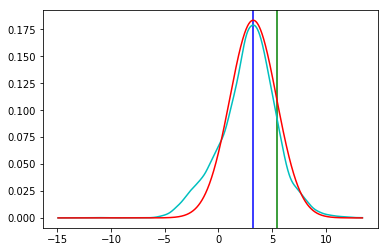

In [16]:
z,mu,U,sigma = z_score_sample(tpm['NC328'])

sample = tpm['NC328'][tpm['NC328'] > 2**-15].copy()
sample = np.log2(sample)
kde = stats.gaussian_kde(sample)
x = np.linspace(start=sample.min(), stop=sample.max(), num=1024)
w = np.random.normal(mu,sigma,)
print('mu =', mu)
print('U =', U)
print('sigma =', sigma)
plt.axvline(mu, c='b')
#plt.axvline(U, c='g')
plt.axvline(mu+sigma, c='g')
plt.plot(x,kde(x), c='c')
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)), c='r')

In [45]:
zfpkm = z_score(fpkm, skip=5)
zfpkm

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
7,Zm00001d033979,1,gene,279975978,279978430,1.444442,1.437420,0.982865,1.226953,1.496577,...,1.116768,1.083631,0.998267,0.949183,0.922423,0.637900,0.713056,0.580805,0.498781,1.091955
22,Zm00001d031073,1,gene,175980668,175983357,-1.473352,-1.806158,-1.666701,-1.177559,-1.609788,...,-1.174141,-1.231116,-1.438062,-1.404430,-0.893407,-1.030349,-1.377566,-1.423908,-0.837781,-1.522137
23,Zm00001d034961,1,gene,306881093,306895296,-4.337676,-5.122318,-4.423327,-4.664127,-4.409873,...,-4.494026,-15.000000,-4.072385,-3.868839,-15.000000,-15.000000,-4.073558,-4.129585,-3.730705,-3.573732
35,Zm00001d022701,1,lincRNA_gene,27303532,27304500,-15.000000,-3.717061,-4.313504,-3.242958,-3.577987,...,-15.000000,-15.000000,-15.000000,-2.645660,-2.651671,-2.948791,-2.901974,-2.929829,-15.000000,-2.908963
42,Zm00001d022951,1,lincRNA_gene,247966116,247966918,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44227,Zm00001d026285,10,gene,142830920,142833263,0.888349,0.567716,0.903390,0.712334,0.450696,...,0.885802,0.841951,0.845874,0.659335,0.949268,0.705551,0.767144,0.815315,1.218087,0.659134
44240,Zm00001d024994,10,gene,98236754,98238985,-15.000000,-15.000000,-4.681898,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
44241,Zm00001d025980,10,gene,135233564,135243356,-5.463528,-1.270475,-1.076829,-0.671525,-4.378708,...,-1.231990,-1.320632,-0.714723,-2.191938,-0.591622,-1.023320,-15.000000,-1.199199,-0.509217,-2.494014
44243,Zm00001d025452,10,gene,119056860,119059431,0.543317,0.758708,0.726418,0.613032,0.498162,...,0.822624,0.822714,1.044401,0.805737,0.919811,0.811948,0.670445,0.639557,0.859998,0.628193


In [46]:
zfpkm.to_csv(dst+'zfpkm_.csv', index=False)


In [47]:
ztpm = z_score(tpm, skip=0)
ztpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
7,1.442830,1.442229,0.976365,1.226953,1.496577,1.203751,1.132476,1.201609,1.483521,1.346785,...,1.111596,1.083631,0.997527,0.949183,0.922423,0.639428,0.713056,0.583311,0.498781,1.091955
22,-1.480005,-1.792290,-1.683302,-1.177559,-1.609788,-1.201899,-1.276987,-1.322667,-1.392956,-1.130429,...,-1.192605,-1.231116,-1.441226,-1.404430,-0.893407,-1.028225,-1.377566,-1.417699,-0.837781,-1.522137
23,-4.349279,-5.099187,-4.450438,-4.664127,-4.409873,-4.642915,-5.192102,-5.457917,-15.000000,-4.485223,...,-4.531753,-15.000000,-4.078171,-3.868839,-15.000000,-15.000000,-4.073558,-4.118378,-3.730705,-3.573732
35,-15.000000,-3.697855,-4.340196,-3.242958,-3.577987,-3.482069,-2.973082,-4.085221,-3.651054,-15.000000,...,-15.000000,-15.000000,-15.000000,-2.645660,-2.651671,-2.945981,-2.901974,-2.920839,-15.000000,-2.908963
42,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44227,0.885777,0.574953,0.896588,0.712334,0.450696,0.876367,0.888382,0.965447,0.639137,0.740873,...,0.879289,0.841951,0.844983,0.659335,0.949268,0.707055,0.767144,0.817387,1.218087,0.659134
44240,-15.000000,-15.000000,-4.709995,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
44241,-5.477077,-1.258103,-1.091181,-0.671525,-4.378708,-4.914355,-0.892432,-0.857339,-1.026261,-0.933667,...,-1.250790,-1.320632,-0.717167,-2.191938,-0.591622,-1.021198,-15.000000,-1.193405,-0.509217,-2.494014
44243,0.540149,0.765413,0.718940,0.613032,0.498162,0.581389,0.537591,0.622082,0.530825,0.676783,...,0.815745,0.822714,1.043707,0.805737,0.919811,0.813414,0.670445,0.641954,0.859998,0.628193


In [48]:
ztpm.to_csv(dst+'ztpm_all_chr.csv', index=False)

In [49]:
ztpm['var'] = ztpm.var(axis='columns')
ztpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43,var
7,1.442830,1.442229,0.976365,1.226953,1.496577,1.203751,1.132476,1.201609,1.483521,1.346785,...,1.083631,0.997527,0.949183,0.922423,0.639428,0.713056,0.583311,0.498781,1.091955,0.046721
22,-1.480005,-1.792290,-1.683302,-1.177559,-1.609788,-1.201899,-1.276987,-1.322667,-1.392956,-1.130429,...,-1.231116,-1.441226,-1.404430,-0.893407,-1.028225,-1.377566,-1.417699,-0.837781,-1.522137,0.083705
23,-4.349279,-5.099187,-4.450438,-4.664127,-4.409873,-4.642915,-5.192102,-5.457917,-15.000000,-4.485223,...,-15.000000,-4.078171,-3.868839,-15.000000,-15.000000,-4.073558,-4.118378,-3.730705,-3.573732,12.453905
35,-15.000000,-3.697855,-4.340196,-3.242958,-3.577987,-3.482069,-2.973082,-4.085221,-3.651054,-15.000000,...,-15.000000,-15.000000,-2.645660,-2.651671,-2.945981,-2.901974,-2.920839,-15.000000,-2.908963,35.878457
42,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44227,0.885777,0.574953,0.896588,0.712334,0.450696,0.876367,0.888382,0.965447,0.639137,0.740873,...,0.841951,0.844983,0.659335,0.949268,0.707055,0.767144,0.817387,1.218087,0.659134,0.042402
44240,-15.000000,-15.000000,-4.709995,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,7.471104
44241,-5.477077,-1.258103,-1.091181,-0.671525,-4.378708,-4.914355,-0.892432,-0.857339,-1.026261,-0.933667,...,-1.320632,-0.717167,-2.191938,-0.591622,-1.021198,-15.000000,-1.193405,-0.509217,-2.494014,23.937177
44243,0.540149,0.765413,0.718940,0.613032,0.498162,0.581389,0.537591,0.622082,0.530825,0.676783,...,0.822714,1.043707,0.805737,0.919811,0.813414,0.670445,0.641954,0.859998,0.628193,0.016296


In [50]:
high_z = ztpm[ztpm['var'] > 45]
high_z

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43,var
595,-2.176894,-2.516461,-2.122949,-1.811041,-15.000000,-1.587603,-15.000000,-15.000000,-15.000000,-15.000000,...,-1.440226,-0.789276,-1.380826,-0.310617,-0.767679,-1.044785,-0.262074,-2.152502,-0.752655,46.044568
784,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,0.332447,-15.000000,-15.000000,0.490747,-4.111262,...,0.045221,-2.148968,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,48.950414
1138,-1.111670,-0.228701,-2.856228,-15.000000,-15.000000,-15.000000,0.676587,-15.000000,-15.000000,-15.000000,...,0.633952,1.369857,0.126727,-15.000000,-15.000000,-1.853496,1.140215,-15.000000,0.512562,56.493069
1703,-15.000000,-15.000000,-1.142986,-15.000000,-15.000000,-1.168935,-15.000000,-1.974978,-1.122680,-15.000000,...,-15.000000,-1.232040,-15.000000,-15.000000,-0.848059,-1.249555,-15.000000,-15.000000,-0.828039,47.294864
3912,-15.000000,-2.608969,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-0.059264,-2.238063,-15.000000,-15.000000,-0.483444,-15.000000,-15.000000,-15.000000,47.604844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40268,-15.000000,-15.000000,-15.000000,-1.118427,-1.614060,-15.000000,-2.044541,-15.000000,-15.000000,-15.000000,...,-0.007526,-0.141651,-0.152579,0.035197,0.067292,-0.616830,0.794574,-0.466987,0.206507,52.734456
41343,-1.756498,-15.000000,-0.911122,-15.000000,-1.561004,-1.001160,-15.000000,-3.143310,-1.602825,-1.345444,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-0.980128,-0.751548,-15.000000,-15.000000,45.658359
41516,-15.000000,-15.000000,-15.000000,-15.000000,-2.999251,-2.441966,-2.908893,-2.003762,-15.000000,-3.119581,...,0.118116,-0.086335,-0.465256,0.373833,-0.391612,-1.035657,0.237788,1.057360,-1.030137,45.904719
42187,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-2.523932,-0.283201,-15.000000,-15.000000,...,-0.987678,-1.232296,-3.037245,-15.000000,-15.000000,-1.415565,-15.000000,-0.932265,-15.000000,45.215547


In [51]:
name_pos=zfpkm.iloc[:,0:5]
name_pos

,gene,chromosome,feature_type,position_left,position_right
7,Zm00001d033979,1,gene,279975978,279978430
22,Zm00001d031073,1,gene,175980668,175983357
23,Zm00001d034961,1,gene,306881093,306895296
35,Zm00001d022701,1,lincRNA_gene,27303532,27304500
42,Zm00001d022951,1,lincRNA_gene,247966116,247966918
...,...,...,...,...,...
44227,Zm00001d026285,10,gene,142830920,142833263
44240,Zm00001d024994,10,gene,98236754,98238985
44241,Zm00001d025980,10,gene,135233564,135243356
44243,Zm00001d025452,10,gene,119056860,119059431


In [52]:
high_z_name_pos=pd.merge(name_pos,high_z,left_index=True, right_index=True)
high_z_name_pos

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43,var
595,Zm00001d032887,1,gene,241511969,241512341,-2.176894,-2.516461,-2.122949,-1.811041,-15.000000,...,-1.440226,-0.789276,-1.380826,-0.310617,-0.767679,-1.044785,-0.262074,-2.152502,-0.752655,46.044568
784,Zm00001d030902,1,gene,166630764,166633673,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,0.045221,-2.148968,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,48.950414
1138,Zm00001d027695,1,gene,11304566,11304881,-1.111670,-0.228701,-2.856228,-15.000000,-15.000000,...,0.633952,1.369857,0.126727,-15.000000,-15.000000,-1.853496,1.140215,-15.000000,0.512562,56.493069
1703,Zm00001d033400,1,gene,261836341,261838185,-15.000000,-15.000000,-1.142986,-15.000000,-15.000000,...,-15.000000,-1.232040,-15.000000,-15.000000,-0.848059,-1.249555,-15.000000,-15.000000,-0.828039,47.294864
3912,Zm00001d033662,1,gene,269968475,269969325,-15.000000,-2.608969,-15.000000,-15.000000,-15.000000,...,-15.000000,-0.059264,-2.238063,-15.000000,-15.000000,-0.483444,-15.000000,-15.000000,-15.000000,47.604844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40268,Zm00001d026498,10,gene,147196017,147196308,-15.000000,-15.000000,-15.000000,-1.118427,-1.614060,...,-0.007526,-0.141651,-0.152579,0.035197,0.067292,-0.616830,0.794574,-0.466987,0.206507,52.734456
41343,Zm00001d025350,10,gene,115137908,115138444,-1.756498,-15.000000,-0.911122,-15.000000,-1.561004,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-0.980128,-0.751548,-15.000000,-15.000000,45.658359
41516,Zm00001d023387,10,gene,4374701,4375148,-15.000000,-15.000000,-15.000000,-15.000000,-2.999251,...,0.118116,-0.086335,-0.465256,0.373833,-0.391612,-1.035657,0.237788,1.057360,-1.030137,45.904719
42187,Zm00001d023145,10,lincRNA_gene,97217143,97218735,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-0.987678,-1.232296,-3.037245,-15.000000,-15.000000,-1.415565,-15.000000,-0.932265,-15.000000,45.215547


In [53]:
high_z_name_pos.to_csv(dst+'high_ztpm.csv')

In [58]:
fpkm.loc[595]

gene              Zm00001d032887
chromosome                     1
feature_type                gene
position_left          241511969
position_right         241512341
                       ...      
WIL900                   3.21021
Va22                     1.78546
E8501                    5.77429
PHP85                   0.352715
Oh43                     2.16823
Name: 595, Length: 947, dtype: object